Heart Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the data
df = pd.read_csv("/content/heart.csv")
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
544,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
268,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
479,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
761,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1


In [4]:
df.shape

(1025, 14)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
# statistical description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
# null values in each columns
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data Cleaning

In [29]:
# unique values in columns
np.unique(df['sex'])

array([0, 1])

In [30]:
df['chol'].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141])

In [52]:
# deleting the duplicates rows
df = df.drop_duplicates()
print(df.shape)

(302, 14)


In [58]:
# checking the distribution of target
df['target'].value_counts()

,count
target,
1,164
0,138


Data Visualisation

<Axes: xlabel='target', ylabel='count'>

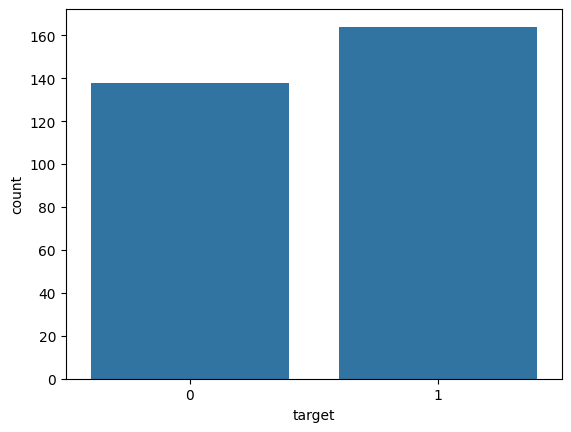

In [56]:
# univariate analysis
sns.countplot(df, x='target')

<Axes: xlabel='target', ylabel='age'>

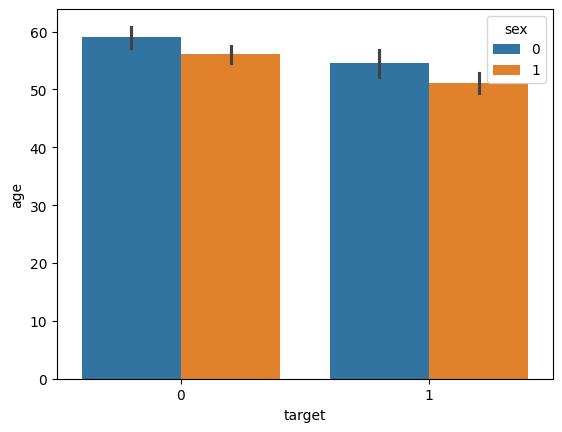

In [66]:
sns.barplot(x = df['target'], y = df['age'], hue=df['sex'])

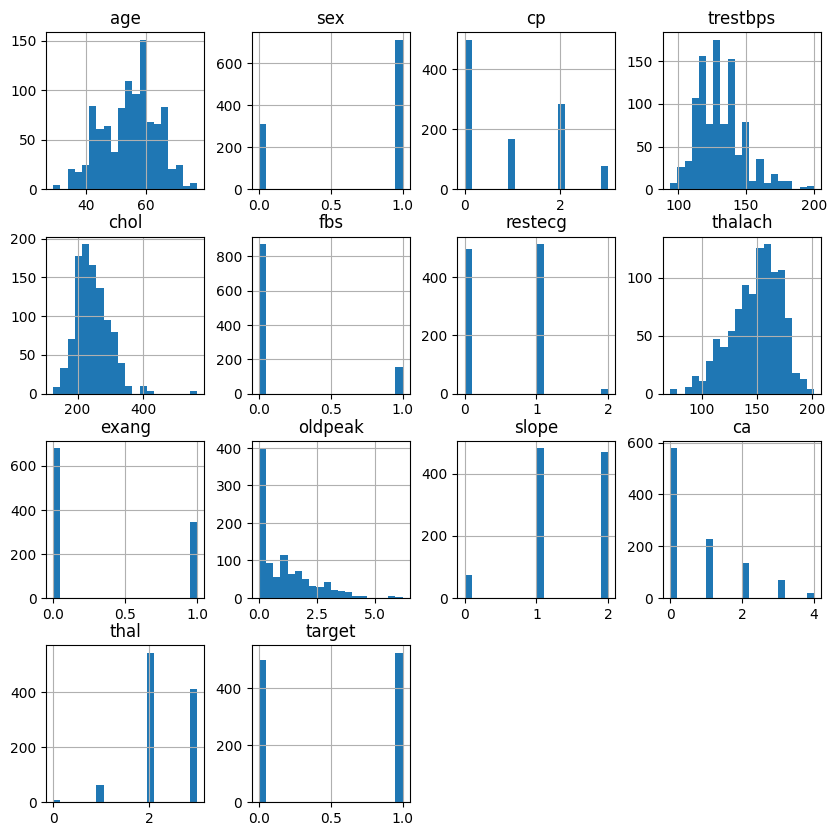

In [32]:
df.hist(bins=20,figsize=(10,10))
plt.show()

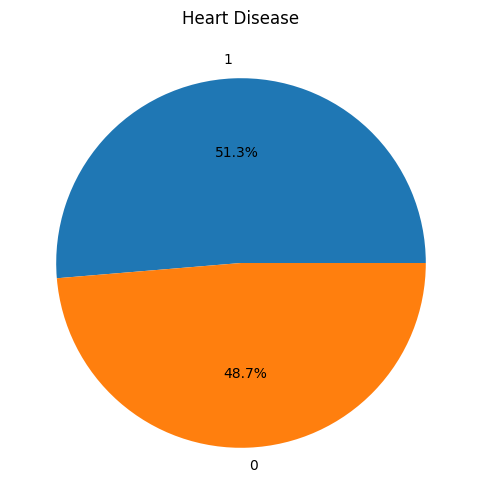

In [37]:
target_counts = df["target"].value_counts()
plt.figure(figsize=(12,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Heart Disease')
plt.show()

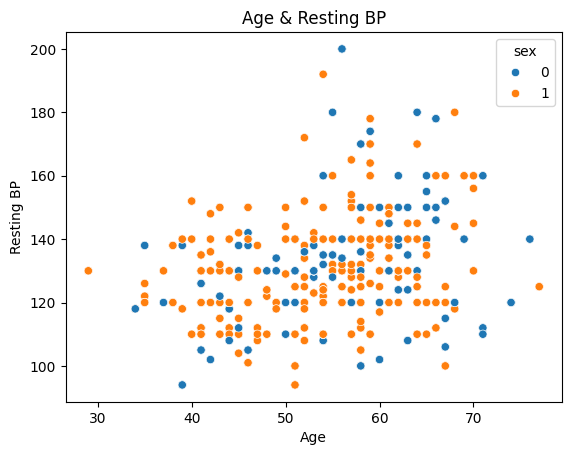

In [44]:
sns.scatterplot(data=df, x='age', y='trestbps', hue='sex')
plt.title('Age & Resting BP')
plt.xlabel('Age')
plt.ylabel('Resting BP')
plt.show()

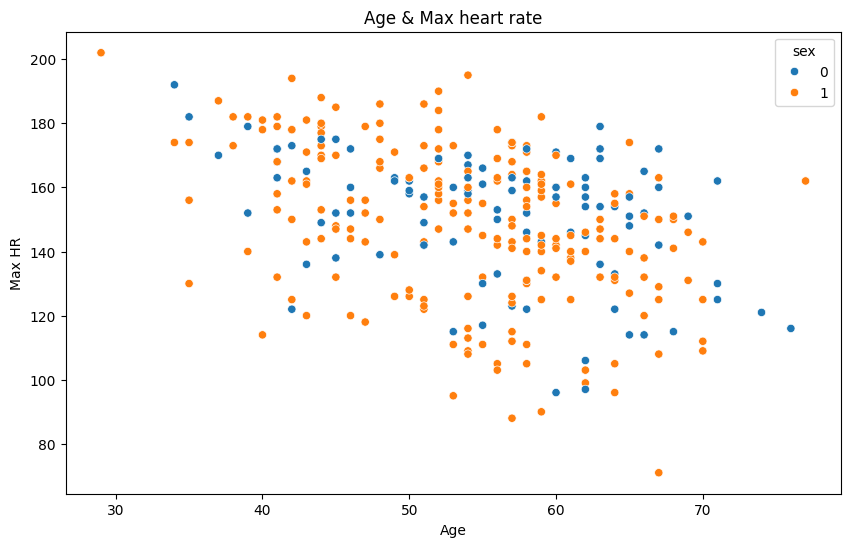

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='sex')
plt.title('Age & Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max HR')
plt.show()

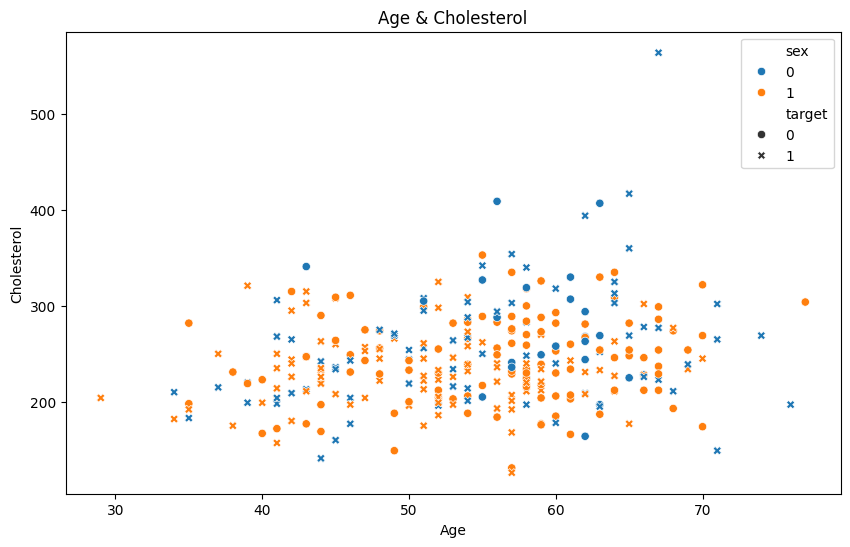

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='sex', style='target')
plt.title('Age & Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

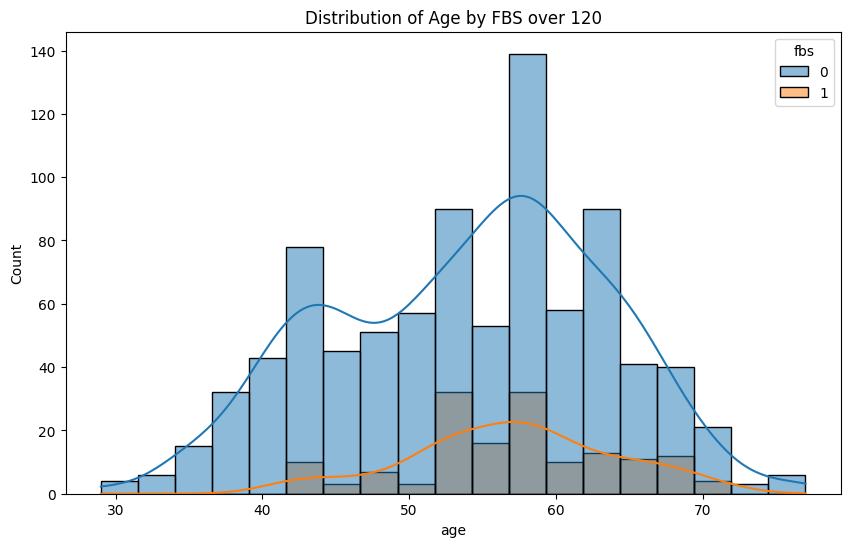

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='fbs', kde=True)
plt.title('Distribution of Age by FBS over 120')
plt.show()

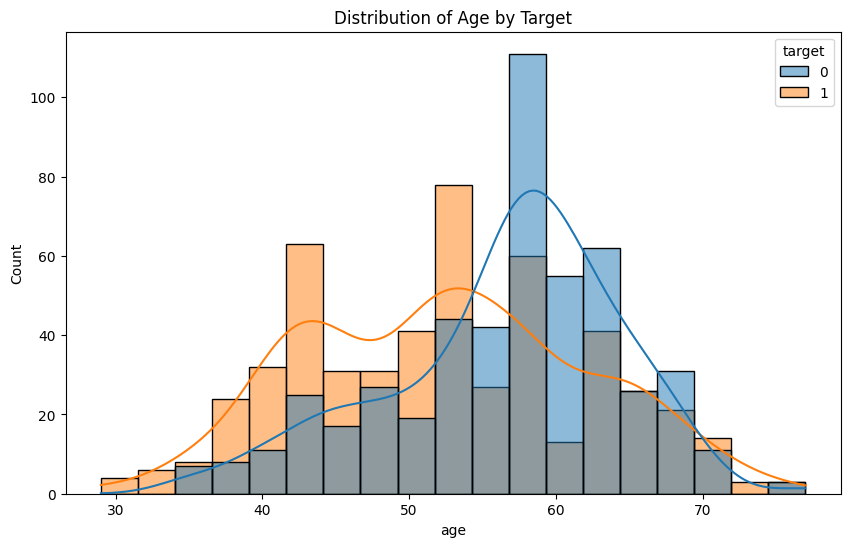

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Distribution of Age by Target')
plt.show()

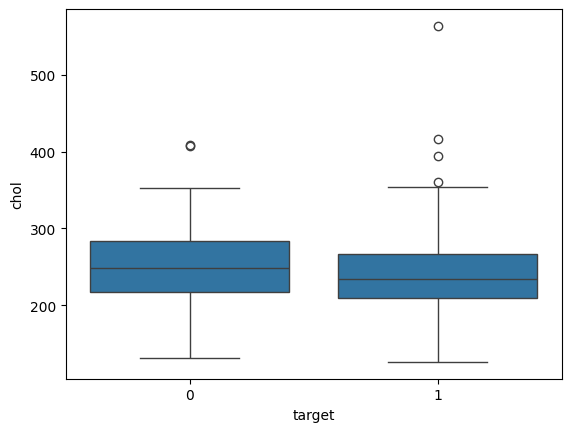

In [60]:
# checking the outliers in the data
sns.boxplot(data=df, x='target', y='chol')
plt.show()

<Axes: xlabel='sex', ylabel='age'>

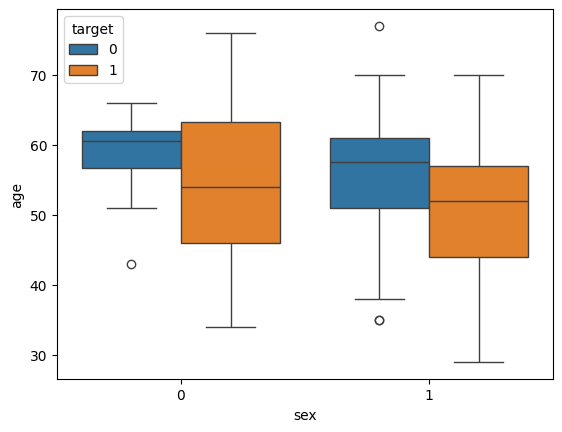

In [67]:
sns.boxplot(x = df['sex'], y = df['age'], hue = df['target'])

<ipython-input-69-a9645934e7b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == 0]['age'], hist = False)
<ipython-input-69-a9645934e7b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == 1]['age'], hist = False)


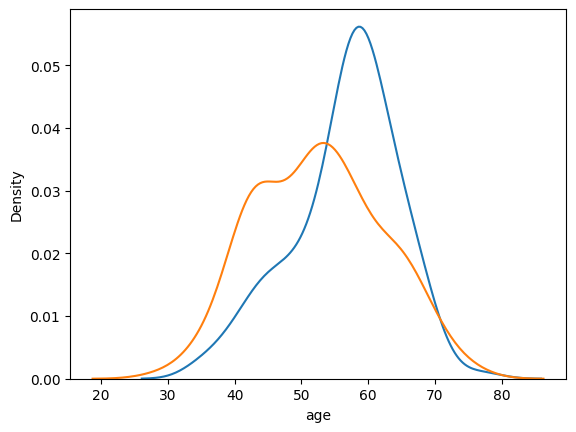

In [69]:
sns.distplot(df[df['target'] == 0]['age'], hist = False)
sns.distplot(df[df['target'] == 1]['age'], hist = False)
plt.show()

In [47]:
correlation_matrix=df.corr()

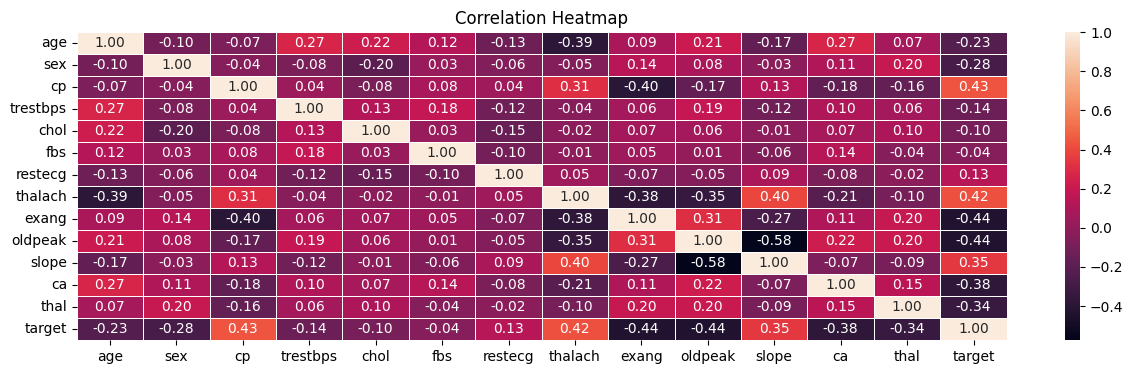

In [51]:
plt.figure(figsize=(15, 4))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()